# The dataset

We will work with the somewhat misleadingly named "Adult Data Set" from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Adult). The data is in the file "adult.csv".

**General info**
> Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.


**Field info**
> age: continuous.

> workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

> fnlwgt: continuous.

> education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters,
1st-4th, 10th, Doctorate, 5th-6th, Preschool.

> education-num: continuous.

>marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

>occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, 
Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

>relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

> race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

> sex: Female, Male.

> capital-gain: continuous.

> capital-loss: continuous.

> hours-per-week: continuous.

> native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


# Loading and exploring the data



In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1NTDeOe8KJnXy6OVfBjpiJoZzdjtM5Hvi" -O adult.csv

--2022-02-28 15:18:35--  https://drive.google.com/uc?export=download&id=1NTDeOe8KJnXy6OVfBjpiJoZzdjtM5Hvi
Resolving drive.google.com (drive.google.com)... 142.251.120.100, 142.251.120.113, 142.251.120.138, ...
Connecting to drive.google.com (drive.google.com)|142.251.120.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-bk-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/quokhq2pbglgab2g9cah0jn9eko8cnv8/1646061450000/07111638629254909344/*/1NTDeOe8KJnXy6OVfBjpiJoZzdjtM5Hvi?e=download [following]
--2022-02-28 15:18:35--  https://doc-0g-bk-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/quokhq2pbglgab2g9cah0jn9eko8cnv8/1646061450000/07111638629254909344/*/1NTDeOe8KJnXy6OVfBjpiJoZzdjtM5Hvi?e=download
Resolving doc-0g-bk-docs.googleusercontent.com (doc-0g-bk-docs.googleusercontent.com)... 142.250.152.132, 2607:f8b0:4001:c56::84
Connecting to doc-0g-bk-docs.googleusercontent.com (doc-0g-bk

In [ ]:
import pandas as pd

df = pd.read_csv("adult.csv")

df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


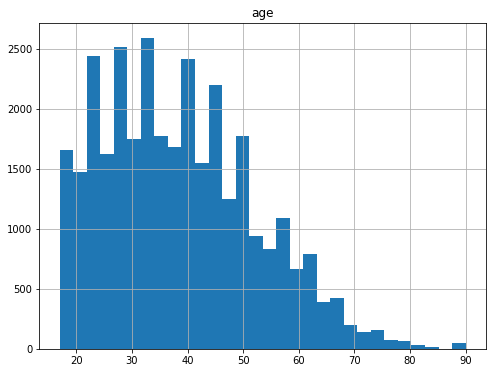

In [ ]:
df.hist(["age"], bins=30, figsize=(8, 6));

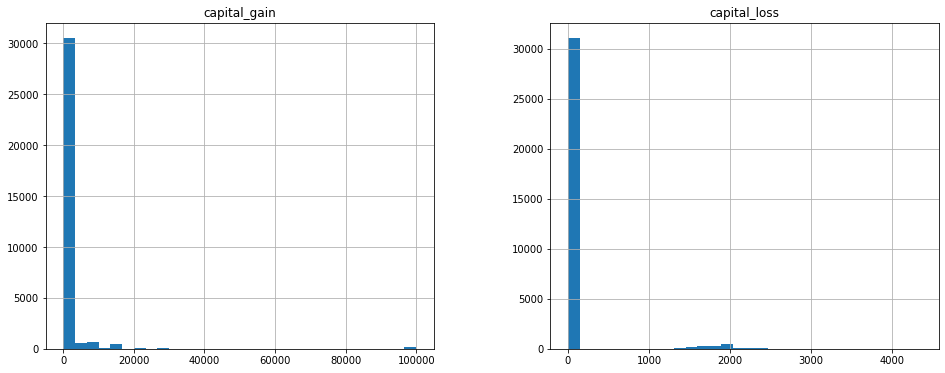

In [ ]:
df.hist(["capital_gain", "capital_loss"], bins=30, figsize=(16, 6));

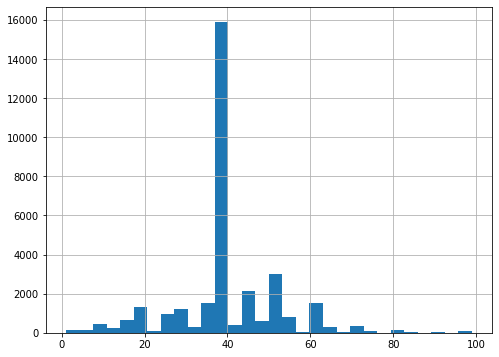

In [ ]:
df.hours_per_week.hist(bins=30, figsize=(8, 6));

Let us clarify the relationship between the education_num and education colums.

In [ ]:
df[["education", "education_num"]].drop_duplicates().sort_values("education_num")

,education,education_num
224,Preschool,1
160,1st-4th,2
56,5th-6th,3
15,7th-8th,4
6,9th,5
77,10th,6
3,11th,7
415,12th,8
2,HS-grad,9
10,Some-college,10


Conclusion: the education_num column is a good linear scale encoding of the education columm, so we can get rid of the latter. We can also drop the (for us) useless "fnlwgt" column.

In [ ]:
df.drop(columns=["fnlwgt", "education"], inplace=True)
df.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


We can encode the binary category values as binary codes.

In [ ]:
df["sex"] = df.sex.replace({"Female": 1, "Male": 0})
df["income"]= df.income.replace({"<=50K": 0, ">50K": 1})

In [ ]:
df.describe()

,age,education_num,sex,capital_gain,capital_loss,hours_per_week,income
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,0.330795,1077.648844,87.303830,40.437456,0.240810
std,13.640433,2.572720,0.470506,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,12.000000,1.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000


# Clustering

## K-means

We try to cluster the data using the age and education_num columns (we use these two numerical features for easy 2d visualization).

In [ ]:
from sklearn import cluster

kmeans = cluster.KMeans(n_clusters=2)

df["kmeans_pred"] = kmeans.fit_predict(df[["age", "education_num"]]) 

The result can be visualised, e.g., with a scatter plot:

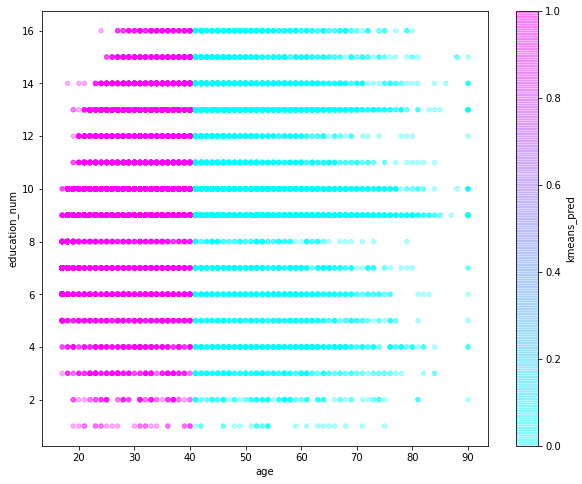

In [ ]:
from matplotlib import pylab
from matplotlib import pyplot as plt

df.plot.scatter("age", "education_num", c="kmeans_pred", cmap=pylab.cm.cool, figsize=(10,8),
                alpha=0.3, # show overlap 
                sharex=False);  # sharex=False is apparently needed because of a bug which causes the xaxis
                                # ticks to disappear when the colormap is shown

Let's try the same but with standardizing first.

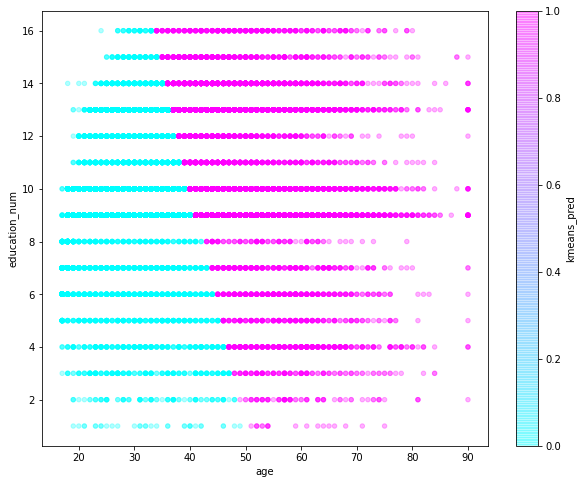

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

standardized = scaler.fit_transform(df[["age", "education_num"]])

df["kmeans_pred"] = kmeans.fit_predict(standardized)
df.plot.scatter("age", "education_num", c="kmeans_pred", cmap=pylab.cm.cool, figsize=(10,8),
                    alpha=0.3, # show overlap
                    sharex=False);   # sharex=False is apparently needed because of a bug which causes the xaxis
                                    # ticks to disappear when the colormap is shown

A visualisation of the classification.

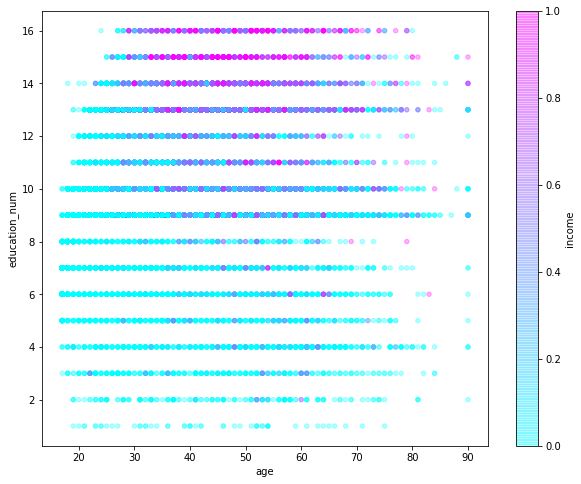

In [ ]:
df.plot.scatter("age", "education_num", c="income", cmap=pylab.cm.cool, figsize=(10,8),
                    alpha=0.3, # show overlap
                    sharex=False);   # sharex=False is apparently needed because of a bug which causes the xaxis
                                    # ticks to disappear when the colormap is shown

It is an intesting question what are the precision etc. scores of this clustering with respect to our classification task.

In [ ]:
## to make sure the cluster labels are aligned with the class labels:

tmp = df[["kmeans_pred", "income", ]].value_counts()
tmp = tmp[~tmp.index.get_level_values(1).duplicated(keep="first")]
most_common_pairs = tmp.iloc[:2]
display(most_common_pairs)

## create a most probable kmeans cluster number : category number dictionary
c_dict = dict(most_common_pairs.index.tolist())
## turn cluster numbers to category numbers
df["kmeans_pred"] = df["kmeans_pred"].map(lambda x: c_dict[x])

kmeans_pred  income
0            0         15622
1            1          5485
dtype: int64

In [ ]:
from sklearn import metrics

print("Precision:", metrics.precision_score(df.income, df.kmeans_pred))
print("Recall:", metrics.recall_score(df.income, df.kmeans_pred))
print("F-measure:", metrics.f1_score(df.income, df.kmeans_pred))

Precision: 0.3761228828087499
Recall: 0.6995281214130851
F-measure: 0.4892079914377452
